In [105]:
import pandas as pd
import numpy as np

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Warsaw real estate market analysis

* [Dataset overwiew](#Dataset-overwiew)
* [Price influencing factors](#Price-influencing-factors)
* [Śródmieście analysis](#Śródmieście-analysis)
* [Price model](#Price-model)
* [Summary](#Summary)

This my biggest data science project so far. I've been working on it during my university summer break. As the title say it's about Warsaw real estate market. I started it by scrapping data from estates auction site named **otodomo**. For this purpose I wrote my own script using **Beautifulsoup** and **Request** libraries. Dataset consist offerts from June 2022. At the begging it had 23323 rows and 14 columns but since the offerts were badly described and misssing lots of rows. Therefore during data cleaning I made decission to drop every row missing at least one value. After cleaning I was left with 5930 rows. More details about data processing and exploration I will describe in later paragraphs.

My main questions about data are:
- What are the most important factors influencing price of real estate?
- Which and why specific districts are more expensive?
- What are the differes between most expensive and cheapest districts?
- How well can I predict price of real estate?

Before that let's explore the dataset.

### Dataset overwiew

Like i mentioned following data is already cleaned and ready to use. Therefore we will already start with some basic statistics. Howerver I want to aknoledge that since I dropped almost quater of the data it might not be the best representation of the market. So let's keep that in mind.

In [106]:
data = pd.read_csv('data/data_clean_removed.csv',usecols= 
['district','Price', 'Space','Rooms','Market','Year','elevator','Parking place','balkon','taras','ogródek','district','street','level','max_level'])

data['district'] =data['district'].str.replace(" ","")
data['Year'] = data['Year'].astype(str) 
data['Price'] = data['Price'].astype(float)
data['Space'] = data['Space'].astype(float)

In [107]:
data.head()

,Price,Space,Rooms,Market,Year,elevator,Parking place,balkon,taras,ogródek,district,street,level,max_level
0,4000000.0,560.0,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
1,4000000.0,560.0,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
2,21350100.0,487.0,10,wtórny,2021,1,1,0,0,0,Śródmieście,Elektryczna,6,6
3,19900000.0,487.0,6,wtórny,2001,1,1,0,0,0,Mokotów,Cybulskiego,5,5
4,795900.0,445.0,2,pierwotny,2022,1,1,0,0,0,Praga-Południe,Gocław,4,8


In [108]:
data.shape

(5930, 14)

<AxesSubplot:title={'center':'Number of flats per year (top 20)'}, xlabel='Year'>

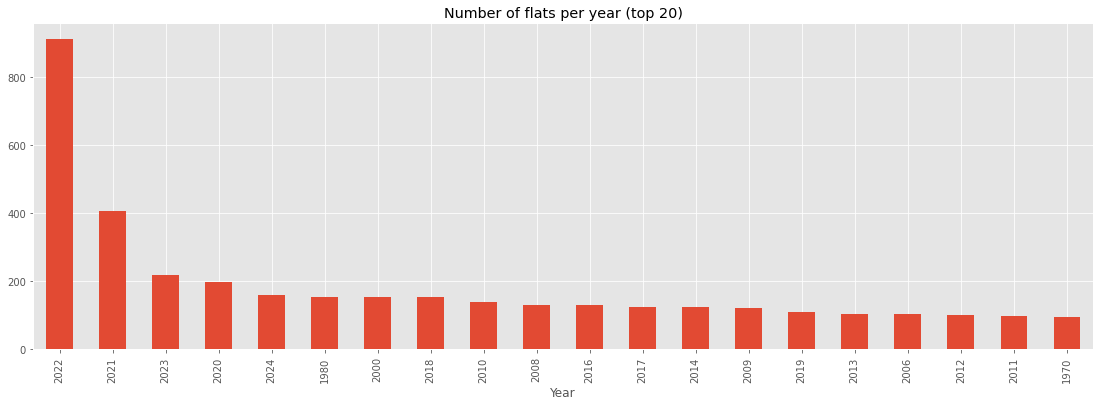

In [109]:
plt.style.use('ggplot')

data.groupby('Year')['Price'].agg(len).sort_values(ascending=False)[:20].plot(kind='bar',figsize=(19,6),title='Number of flats per year (top 20)')

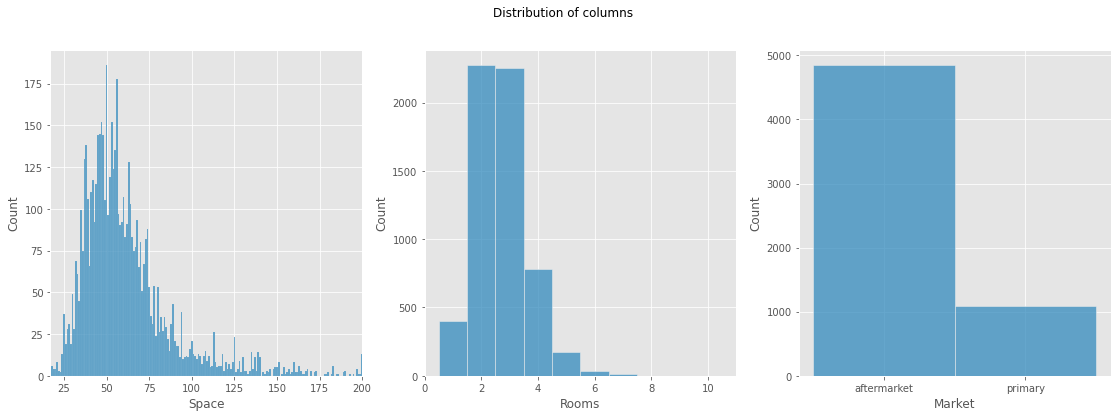

In [136]:
fig, ax = plt.subplots(1,3,figsize=(19,6))
fig.suptitle('Distribution of columns')

sns.histplot(data, x ='Space', discrete=True, ax = ax[0])
ax[0].set_xlim(np.min(data.Space),200);

sns.histplot(data, x ='Rooms', discrete=True, ax = ax[1])
sns.histplot(data, x ='Market', discrete=True, ax = ax[2])
ax[2].set_xticks(['wtórny','pierwotny'],['aftermarket','primary']);

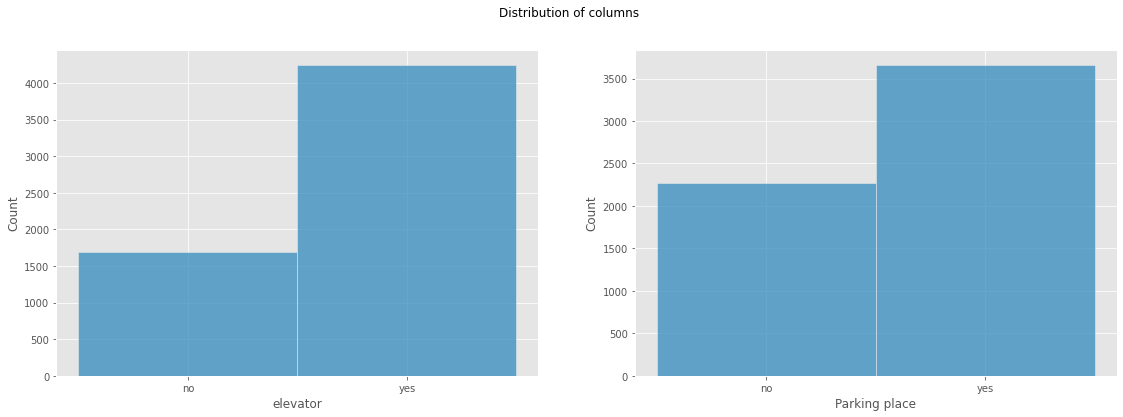

In [130]:
fig, ax = plt.subplots(1,2,figsize=(19,6))
fig.suptitle('Distribution of columns')

plt.xticks([0,1]);
sns.histplot(data, x ='elevator', discrete=True, ax = ax[0]);
ax[0].set_xticks([0,1],['no','yes']);

sns.histplot(data, x ='Parking place', discrete=True, ax = ax[1]);
ax[1].set_xticks([0,1],['no','yes']);


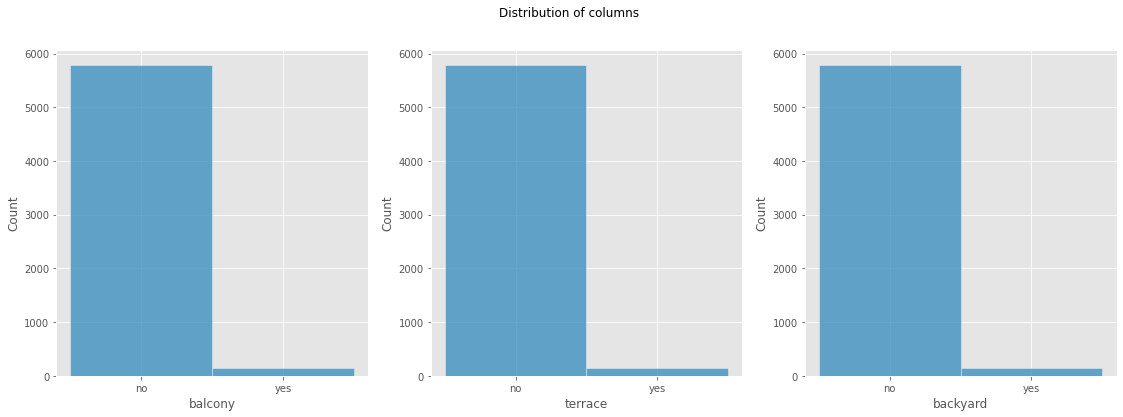

In [134]:
fig, ax = plt.subplots(1,3,figsize=(19,6))
fig.suptitle('Distribution of columns')

plt.xticks([0,1]);
sns.histplot(data, x ='balkon', discrete=True, ax = ax[0]);
ax[0].set_xlabel('balcony')
ax[0].set_xticks([0,1],['no','yes']);

sns.histplot(data, x ='taras', discrete=True, ax = ax[1]);
ax[1].set_xlabel('terrace')
ax[1].set_xticks([0,1],['no','yes']);

sns.histplot(data, x ='ogródek', discrete=True, ax = ax[2]);
ax[2].set_xlabel('backyard')
ax[2].set_xticks([0,1],['no','yes']);


<AxesSubplot:title={'center':'Number of ads per district'}, xlabel='district'>

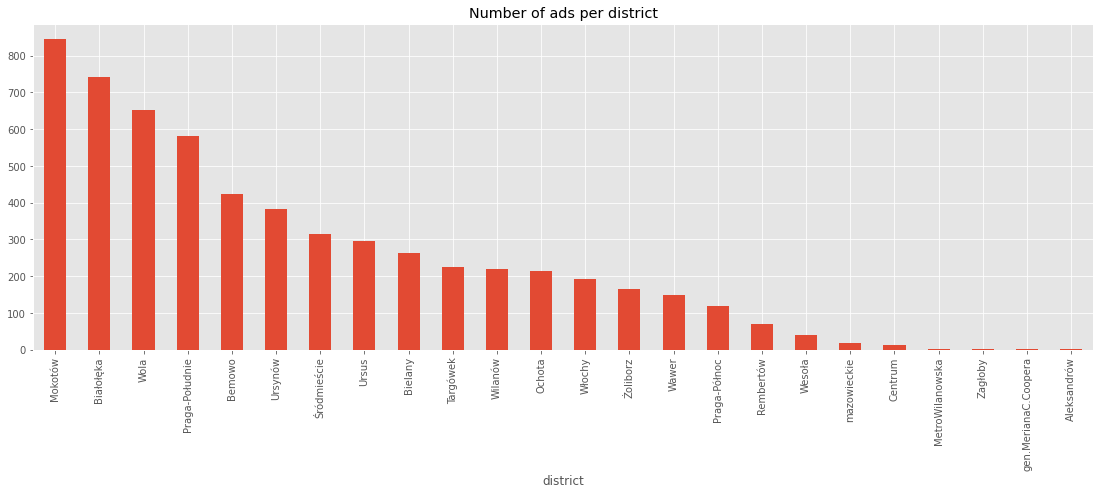

In [113]:
data.groupby('district')['Price'].agg(len).sort_values(ascending=False).plot(kind='bar',figsize=(19,6),title='Number of ads per district')

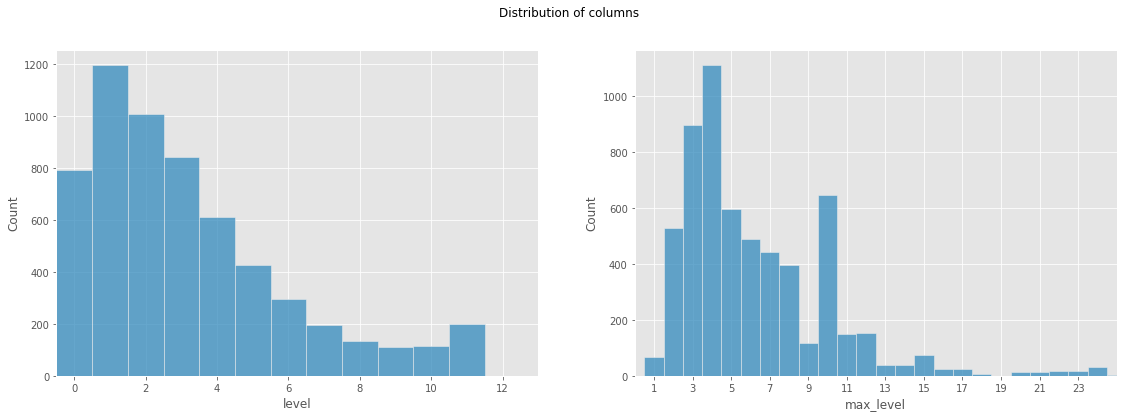

In [114]:
fig, ax = plt.subplots(1,2,figsize=(19,6))
fig.suptitle('Distribution of columns')


sns.histplot(data, x ='level', discrete=True, ax = ax[0])
ax[0].set_xlim(-0.5,13);

sns.histplot(data, x ='max_level', discrete=True, ax = ax[1])
ax[1].set_xlim(0,25);
plt.xticks(np.arange(np.min(data['max_level']), 25, 2.0));

### Price influencing factors

### Śródmieście analysis

### Price model

### Summary